In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import random

## 0、数据处理成csv形式

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
          'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'income']
df_train_set = pd.read_csv('./adult.data', names=columns)
df_test_set = pd.read_csv('./adult.test', names=columns, skiprows=1) #第一行是非法数据

print(df_train_set.head())
print(df_test_set.head())
df_train_set.to_csv('./train_adult.csv', index=False)
df_test_set.to_csv('./test_adult.csv', index=False)

   age          workclass  fnlwgt   education  educationNum  \
0   39          State-gov   77516   Bachelors            13   
1   50   Self-emp-not-inc   83311   Bachelors            13   
2   38            Private  215646     HS-grad             9   
3   53            Private  234721        11th             7   
4   28            Private  338409   Bachelors            13   

         maritalStatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capitalGain  capitalLoss  hoursPerWeek   nativeCountry  income  
0         2174            0            40   United-States   <=50K  
1         

In [3]:
df_test_set.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
len(df_train_set), len(df_test_set), len(df_test_set.columns)

(32561, 16281, 15)

## 1、数据读取

In [5]:
df_train_set = pd.read_csv('./train_adult.csv')
df_train_set

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 2、数据预处理

### 2.1 删除对应属性

In [6]:
df_train_set.drop(['fnlwgt', 'educationNum'], axis=1, inplace=True) # fnlwgt列用处不大，educationNum与education类似
df_test_set.drop(['fnlwgt', 'educationNum'], axis=1, inplace=True) # 测试集也去除掉这两列
print(df_train_set.columns)

Index(['age', 'workclass', 'education', 'maritalStatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss',
       'hoursPerWeek', 'nativeCountry', 'income'],
      dtype='object')


### 2.2 重复行记录处理

In [7]:
df_train_set.drop_duplicates(inplace=True) # 去除重复行

In [8]:
df_train_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### 2.3 缺失值处理

In [9]:
df_train_set[df_train_set.isna().values == True] # 输出有缺失值的数据行

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income


In [10]:
df_train_set.dropna(inplace=True) # 去除空行 

### 2.4 查看列类型

In [11]:
df_train_set.dtypes

age               int64
workclass        object
education        object
maritalStatus    object
occupation       object
relationship     object
race             object
sex              object
capitalGain       int64
capitalLoss       int64
hoursPerWeek      int64
nativeCountry    object
income           object
dtype: object

### 2.5 异常值处理

In [12]:
df_train_set[df_train_set['workclass'].str.contains(r'\?', regex=True)] # 查找异常值, 避免与正则表达式的?冲突需要转义

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,Some-college,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,10th,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,10th,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [13]:
df_train_set=df_train_set[~df_train_set['workclass'].str.contains(r'\?', regex=True)]
df_train_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [14]:
#删除有异常值的行
new_columns = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
               'nativeCountry', 'income']
for col in new_columns:
        df_train_set = df_train_set[~df_train_set[col].str.contains(r'\?', regex=True)]
df_train_set.head()

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.6 数据可视化，以年龄为例

<AxesSubplot: ylabel='Frequency'>

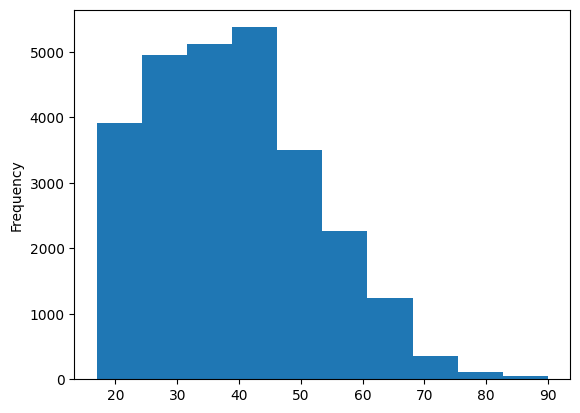

In [15]:
df_train_set['age'].plot.hist()

<AxesSubplot: >

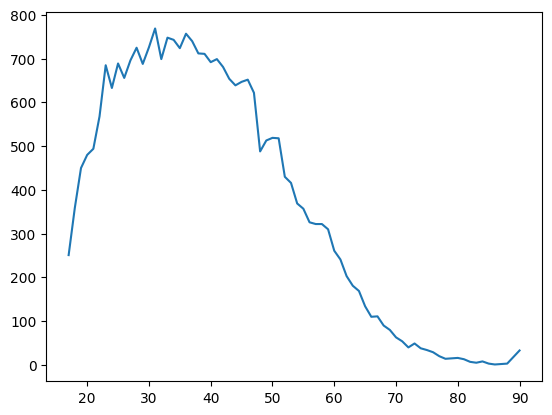

In [16]:
df_train_set['age'].value_counts().sort_index().plot.line()

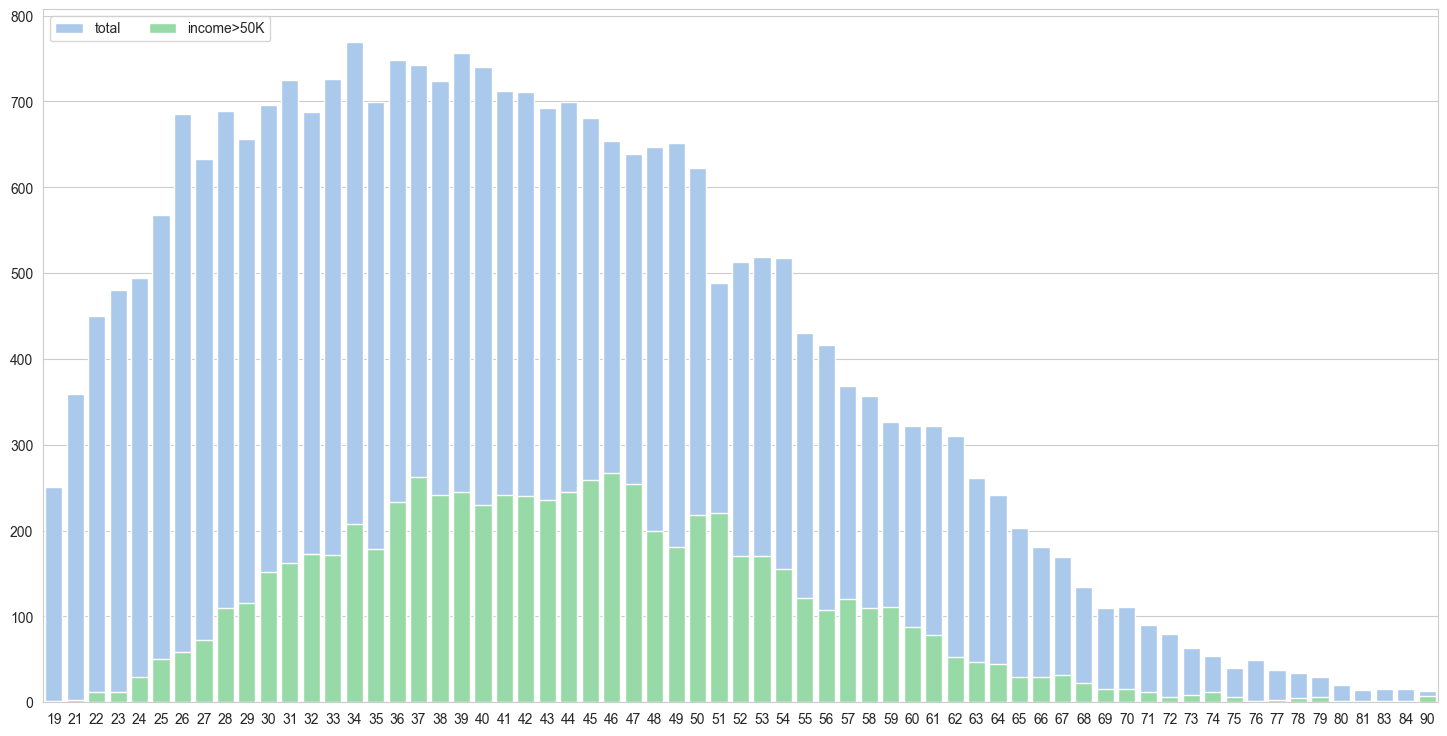

In [17]:
# 画出年龄与收入的关系

df_train_set = df_train_set.reset_index(drop=True) #重置索引
df_train_set['age'].isnull() == True
s=df_train_set['age'].value_counts()
k=df_train_set['age'][df_train_set['income']==' >50K'].value_counts()
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes("pastel")
sns.barplot(x=s.index,y=s.values,label='total',color="b")
sns.barplot(x=k.index,y=k.values,label='income>50K',color="g")
ax.legend(ncol=2, loc="upper left", frameon=True)

### 2.7 连续型变量处理

In [18]:
continuous_column = ['age', 'capitalGain', 'capitalLoss', 'hoursPerWeek']

In [19]:
df_train_set['age'].max(), df_train_set['age'].min()

(90, 17)

In [20]:
df_train_set['age'].head() 

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [21]:
bins = [0, 25, 50, 75, 100] # 分箱区间左开右闭 (0, 25], (25, 50], ...
df_train_set['age'] = pd.cut(df_train_set['age'], bins, labels=False)

In [22]:
df_train_set['age'].head() 

0    1
1    1
2    1
3    2
4    1
Name: age, dtype: int64

In [23]:
# 对测试集数据的年龄属性进行同样处理
df_test_set['age'] = pd.cut(df_test_set['age'], bins, labels=False)
df_test_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,1,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,1,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,0,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,1,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,2,?,HS-grad,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,1,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,1,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [24]:
# 探究其它连续属性的取值分布
print("capitalGain:")
print(df_train_set['capitalGain'].value_counts().sort_index())
print("max = {}, min = {}\n".format(df_train_set['capitalGain'].max(), df_train_set['capitalGain'].min()))

print("capitalLoss:")
print(df_train_set['capitalLoss'].value_counts().sort_index())
print("max = {}, min = {}\n".format(df_train_set['capitalLoss'].max(), df_train_set['capitalLoss'].min()))

print("hoursPerWeek:")
print(df_train_set['hoursPerWeek'].value_counts().sort_index())
print("max = {}, min = {}\n".format(df_train_set['hoursPerWeek'].max(), df_train_set['hoursPerWeek'].min()))
# 观察知其它连续属性的取值不多，因此不使用分箱法进行处理，而是改为在构建决策树时使用二分法

capitalGain:
0        24380
114          6
401          1
594         28
914          8
         ...  
25236       11
27828       32
34095        3
41310        2
99999      147
Name: capitalGain, Length: 118, dtype: int64
max = 99999, min = 0

capitalLoss:
0       25485
155         1
213         4
323         3
419         1
        ...  
3004        1
3683        2
3770        2
3900        2
4356        1
Name: capitalLoss, Length: 90, dtype: int64
max = 4356, min = 0

hoursPerWeek:
1      7
2     15
3     24
4     27
5     37
      ..
95     2
96     5
97     2
98    11
99    78
Name: hoursPerWeek, Length: 94, dtype: int64
max = 99, min = 1



### 2.8 离散型变量处理

In [25]:
discrete_column = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry', 'income']

In [26]:
df_train_set['workclass'].value_counts()

 Private             19214
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [27]:
df_train_set['workclass'].head() #展示前五条

0            State-gov
1     Self-emp-not-inc
2              Private
3              Private
4              Private
Name: workclass, dtype: object

In [28]:
df_train_set['workclass'].value_counts().keys()

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay'],
      dtype='object')

In [29]:
workclass_mapping = {' Private': 0, ' Self-emp-not-inc': 1, ' Self-emp-inc': 1, ' Local-gov': 2, 
                     ' State-gov': 2, ' Federal-gov': 2, ' Without-pay': 3, ' Never-worked': 3}
df_train_set['workclass'] = df_train_set['workclass'].map(workclass_mapping)

In [30]:
df_train_set['workclass'].head()

0    2
1    1
2    0
3    0
4    0
Name: workclass, dtype: int64

In [31]:
# 对测试集的workclass属性也进行上述处理
df_test_set['workclass'] = df_test_set['workclass'].map(workclass_mapping)

In [32]:
# 对训练集、测试集同时处理离散型属性education
education_mapping = {' Preschool': 0,
                     ' 1st-4th': 1,
                     ' 5th-6th': 1,
                     ' 7th-8th': 2,
                     ' 9th': 2,
                     ' 10th': 3,
                     ' 11th': 3,
                     ' 12th': 3,
                     ' HS-grad': 3,
                     ' Some-college': 4,
                     ' Bachelors': 5,
                     ' Prof-school': 6,
                     ' Assoc-acdm': 7,
                     ' Assoc-voc': 8,
                     ' Masters': 9,
                     ' Doctorate': 10
                     }
df_train_set['education'] = df_train_set['education'].map(education_mapping)
df_test_set['education'] = df_test_set['education'].map(education_mapping)

# 对训练集、测试集同时处理离散型属性marital-status
marital_status_mapping = {' Married-civ-spouse': 0,
                          ' Divorced': 1,
                          ' Never-married': 2,
                          ' Separated': 3,
                          ' Widowed': 4,
                          ' Married-spouse-absent': 5,
                          ' Married-AF-spouse': 6
                          }
df_train_set['maritalStatus'] = df_train_set['maritalStatus'].map(marital_status_mapping)
df_test_set['maritalStatus'] = df_test_set['maritalStatus'].map(marital_status_mapping)

# 对训练集、测试集同时处理离散型属性occupation
occupation_mapping = {' Tech-support': 0,
                      ' Craft-repair': 1,
                      ' Other-service': 2,
                      ' Sales': 3,
                      ' Exec-managerial': 4,
                      ' Prof-specialty': 5,
                      ' Handlers-cleaners': 6,
                      ' Machine-op-inspct': 7,
                      ' Adm-clerical': 8,
                      ' Farming-fishing': 9,
                      ' Transport-moving': 10,
                      ' Priv-house-serv': 11,
                      ' Protective-serv': 12,
                      ' Armed-Forces': 13
                      }
df_train_set['occupation'] = df_train_set['occupation'].map(occupation_mapping)
df_test_set['occupation'] = df_test_set['occupation'].map(occupation_mapping)

# 对训练集、测试集同时处理离散型属性relationship
relationship_mapping = {' Wife': 0,
                        ' Own-child': 1,
                        ' Husband': 2,
                        ' Not-in-family': 3,
                        ' Other-relative': 4,
                        ' Unmarried': 5
                        }
df_train_set['relationship'] = df_train_set['relationship'].map(relationship_mapping)
df_test_set['relationship'] = df_test_set['relationship'].map(relationship_mapping)

# 对训练集、测试集同时处理离散型属性race
race_mapping = {' White': 0,
                ' Asian-Pac-Islander': 1,
                ' Amer-Indian-Eskimo': 2,
                ' Other': 3,
                ' Black': 4
                }
df_train_set['race'] = df_train_set['race'].map(race_mapping)
df_test_set['race'] = df_test_set['race'].map(race_mapping)

# 对训练集、测试集同时处理离散型属性sex
sex_mapping = {' Female': 0,
               ' Male': 1,
               }
df_train_set['sex'] = df_train_set['sex'].map(sex_mapping)
df_test_set['sex'] = df_test_set['sex'].map(sex_mapping)

# 对训练集、测试集同时处理离散型属性native-country
native_country_mapping = {' United-States': 0,
                          ' Cambodia': 1,
                          ' England': 2,
                          ' Puerto-Rico': 3,
                          ' Canada': 4,
                          ' Germany': 5,
                          ' Outlying-US(Guam-USVI-etc)': 6,
                          ' India': 7,
                          ' Japan': 8,
                          ' Greece': 9,
                          ' South': 10,
                          ' China': 11,
                          ' Cuba': 12,
                          ' Iran': 13,
                          ' Honduras': 14,
                          ' Philippines': 15,
                          ' Italy': 16,
                          ' Poland': 17,
                          ' Jamaica': 18,
                          ' Vietnam': 19,
                          ' Mexico': 20,
                          ' Portugal': 21,
                          ' Ireland': 22,
                          ' France': 23,
                          ' Dominican-Republic': 24,
                          ' Laos': 25,
                          ' Ecuador': 26,
                          ' Taiwan': 27,
                          ' Haiti': 28,
                          ' Columbia': 29,
                          ' Hungary': 30,
                          ' Guatemala': 31,
                          ' Nicaragua': 32,
                          ' Scotland': 33,
                          ' Thailand': 34,
                          ' Yugoslavia': 35,
                          ' El-Salvador': 36,
                          ' Trinadad&Tobago': 37,
                          ' Peru': 38,
                          ' Hong': 39,
                          ' Holand-Netherlands': 40
                          }
df_train_set['nativeCountry'] = df_train_set['nativeCountry'].map(native_country_mapping)
df_test_set['nativeCountry'] = df_test_set['nativeCountry'].map(native_country_mapping)

# 对训练集、测试集同时处理离散型属性income
income_mapping = {' <=50K': 0,
                  ' >50K': 1,
                  ' <=50K.': 0,
                  ' >50K.': 1,
                  }
df_train_set['income'] = df_train_set['income'].map(income_mapping)
df_test_set['income'] = df_test_set['income'].map(income_mapping)

In [33]:
# 将预处理后的训练集与测试集数据输出到csv文件
df_train_set.to_csv('./train_adult_processed.csv', index=False)
df_test_set.to_csv('./test_adult_processed.csv', index=False)

columns = list(df_train_set.columns)

## 3. 构造决策树，进行训练

In [34]:
def calc_gini(df):
    """
    计算数据集的基尼指数
    :param df: 数据集
    :return: 基尼指数
    """
    p0 = 0
    n = 0
    for num in df['income']:
        if num == 0:
            p0 += 1
        n += 1
    p0 = p0 / n
    p1 = 1 - p0
    return 1 - p0 * p0 - p1 * p1


def split_dataset(df, index, value):
    """
    按照给定的列划分数据集
    :param df: 原始数据集
    :param index: 指定特征的列索引
    :param value: 指定特征的值
    :return: 切分后的数据集(left_df, right_df)
    """
    # 将数据集划分为两半，分发给左子树和右子树
    # index对应离散型特征时，左子树为符合value的子集，右子树为不符合value的子集
    # index对应连续型特征时，左子树为小于等于value的子集，右子树为大于value的子集
    feature = columns[index]
    if feature in discrete_column:
        left_df = df[df[feature] == value]
        right_df = df[df[feature] != value]
    else:
        left_df = df[df[feature] <= value]
        right_df = df[df[feature] > value]
    return left_df, right_df


def choose_best_feature_to_split(df):
    """
    选择最好的特征进行分裂
    :param df: 数据集
    :return: best_value:(分裂特征的index, 特征的值), best_df:(分裂后的左右子树数据集), min_gini:(选择该属性分裂的最小基尼指数)
    """
    best_value = ()
    min_gini = calc_gini(df)
    best_df = ()
    for index in range(len(columns) - 1): # 最后一列是income，因此要减1
        feature = columns[index]
        for val in set(df[feature].values):
            left_df, right_df = split_dataset(df, index, val)
            left_size = len(left_df)
            right_size = len(right_df)
            if left_size == 0 or right_size == 0:
                continue
            total_size = left_size + right_size
            left_gini = calc_gini(left_df)
            right_gini = calc_gini(right_df)
            new_gini = left_gini * left_size / total_size + right_gini * right_size / total_size
            if new_gini < min_gini:
                min_gini = new_gini
                best_value = index, val
                best_df = left_df, right_df
    return best_value, best_df, min_gini


def build_decision_tree(df):
    """
    构建CART树
    :param df: 数据集
    :return: CART树
    """
    best_value, best_df, min_gini = choose_best_feature_to_split(df)
    # CART树表示为[leaf_flag, label, left_tree, right_tree, best_value]，其中leaf_flag标记是否为叶子
    if len(set(df['income'])) == 1: # 若income的取值只有一种，说明已分“纯”
        cart = np.array([1, list(df['income'])[0], None, None, ()], dtype=object)
        return cart # 递归结束情况1: 若当前集合的所有样本标签相等,即样本已被分"纯",则可以返回该标签值作为一个叶子节点
    elif best_value == (): # 若best_value为()，说明已经没有可用的特征
        if sum(df['income']) > (len(df['income']) - sum(df['income'])):
            label = 1
        else:
            label = 0
        cart = np.array([1, label, None, None, ()], dtype=object)
        return cart # 递归结束情况2: 若当前训练集的所有特征都被使用完毕,当前无可用特征但样本仍未分"纯"，则返回样本最多的标签作为结果
    else:
        left_tree = build_decision_tree(best_df[0])
        right_tree = build_decision_tree(best_df[1])
        cart = np.array([0, -1, left_tree, right_tree, best_value], dtype=object)
        return cart


def save_decision_tree(cart):
    """
    决策树的存储
    :param cart: 训练好的决策树
    :return: void
    """
    np.save('cart.npy', cart)
    
    
def load_decision_tree():
    """
    决策树的加载
    :return: 保存的决策树
    """    
    
    cart = np.load('cart.npy', allow_pickle=True)
    return cart


In [35]:
df_train = df_train_set.copy() #防止预处理重新来

In [36]:
df_train.head()

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,1,2,5,2,8,3,0,1,2174,0,40,0,0
1,1,1,5,0,4,2,0,1,0,0,13,0,0
2,1,0,3,1,6,3,0,1,0,0,40,0,0
3,2,0,3,0,6,2,4,1,0,0,40,0,0
4,1,0,5,0,5,0,4,0,0,0,40,12,0


In [37]:
print("正在构造决策树，构造所需时间一般在三分钟以内")
cart = build_decision_tree(df_train)
save_decision_tree(cart)
print("决策树构造完毕且已经被存储到文件cart.npy中")

正在构造决策树，构造所需时间一般在三分钟以内
决策树构造完毕且已经被存储到文件cart.npy中


## 4. 评估

In [38]:
def classify(cart, df_row):
    """
    用训练好的决策树进行分类
    :param cart:决策树模型
    :param df_row: 一条测试样本
    :return: 预测结果
    """
    while cart[0] != 1:
        index, value = cart[4]
        feature = columns[index]
        if feature in discrete_column:
            if df_row[feature] == value:
                cart = cart[2]
            else:
                cart = cart[3]
        else:
            if df_row[feature] <= value:
                cart = cart[2]
            else:
                cart = cart[3]
    return cart[1]


def predict(cart, df):
    """
    用训练好的决策树进行分类
    :param cart:决策树模型
    :param df: 所有测试集
    :return: 预测结果
    """
    pred_list = []
    for i in range(len(df)):
        pred_label = classify(cart, df.iloc[i,:])
        if pred_label == -1:
            pred_label = random.randint(0, 1) # 防止classify执行到返回-1,但一般不会执行到返回-1
        pred_list.append(pred_label)
    return pred_list

def calc_acc(pred_list, test_list):
    """
    返回预测准确率
    :param pred_list: 预测列表
    :param test_list: 测试列表
    :return: 准确率
    """
    pred = np.array(pred_list)
    test = np.array(test_list)
    acc = np.sum(pred_list == test_list) / len(test_list)
    return acc

## 5. 运行模型

#### 用测试集评估模型的准确性

In [39]:
cart = load_decision_tree() # 加载模型

In [40]:
test_list = df_test_set['income'].to_numpy()
pred_list = predict(cart, df_test_set)

In [41]:
acc = calc_acc(pred_list, test_list)

In [42]:
acc

0.8382163257785148